In [2]:
import urllib.request
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk, string
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from html_similarity import style_similarity, structural_similarity, similarity
## Github Sources: https://github.com/matiskay/html-similarity 

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.by import By

#### Function to check the security of website, and scraping the website content 

In [30]:
def security_check(url):
    if 'https:' in url:
        print ('Excellent! Your website is security by using https')
    else:
        print ('Your website is not security, please try to use https instead of http')

def contents_url(url):
    request = urllib.request.Request(url)
    html = urllib.request.urlopen(request).read()
    soup = BeautifulSoup(html,'html.parser')
    # get all information with tag to check structural & style similarity 
    soup_srt = str(soup) 
    # clearn the tags and get the contents within <p>
    x = str(soup.find_all('p'))
    # Remove anything between two html tags
    tr = str(re.sub("<.*?>", "", x))
    # Only keep letter and numbers 
    content = re.sub('[^A-Za-z0-9]+',' ', tr)
#     print(content)
    return soup_srt, content

#### Function to count the number of internal links and external links 

In [140]:
def links_count(url):
    resp = urllib.request.urlopen(url)
    soup = BeautifulSoup(resp, from_encoding=resp.info().get_param('charset'))
    domain = urlparse(url).hostname.split('.')[1]  #url.split("www.")[-1].split("/")[0].split('?')[0]

    internal_links = []
    external_links = []

    for link in soup.find_all('a', href=True): #soup.findAll('a', attrs={'href': re.compile("^http://")}): #soup.find_all('a', href=True):
        if ((domain) in link['href']) | (link['href'].startswith('/')) :
            internal_links.append(link['href'])
        else:
            external_links.append(link['href'])

    int_links_counts = len(set(internal_links))
    ext_links_counts = len(set(external_links))
    print ('Your website has {} internal links, and {} external links'.format(int_links_counts, ext_links_counts))
    return internal_distinct_link, external_distinct_link

#### Function to build the wordcloud

In [141]:
stopwords = ['Lincoln', 'Thrivent','Fidelity', 'Family'] + list(set(STOPWORDS))
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.show()

#### Function to clean the words, and clacualte the similiarity score

In [142]:
# Reference source: https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents
# nltk.download('punkt') # if necessary...
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

## Use the previous list of stopwords, you could put a list of words act as your speical stop-words,
stop_words =  stopwords

def remove_stopwords(text):
    clean_sent =[]
    for w in word_tokenize(text):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    text = remove_stopwords(text)
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize)

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

### website 1: Lincoln Park Vet 

Excellent! Your website is security by using https
Your website has 36 internal links, and 5 external links


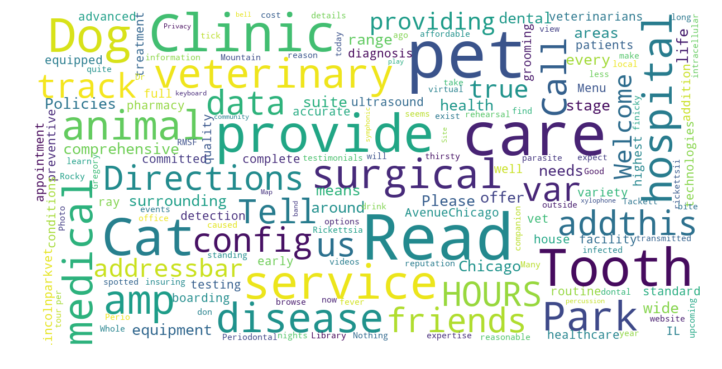

In [143]:
url = 'https://www.lincolnparkvet.vet/'
security_check(url)
links_count(url)
lp_all, lp_p = contents_url(url)
show_wordcloud(lp_p)

### website 2: Family Pet Animal Hospital

Excellent! Your website is security by using https
Your website has 99 internal links, and 5 external links


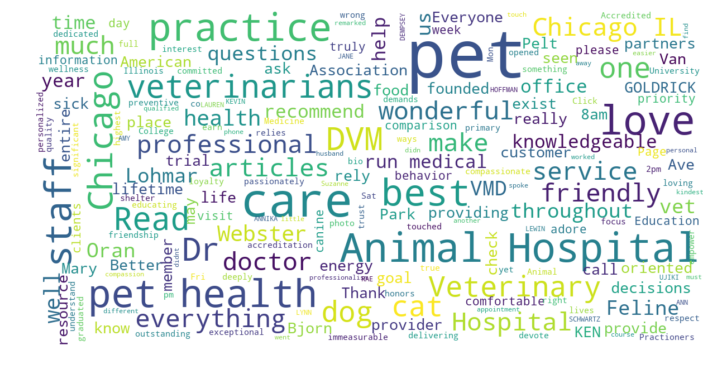

In [144]:
url = 'https://familypetanimalhospital.com/'
security_check(url)
links_count(url)
fpah_all, fpah_p = contents_url(url)
show_wordcloud(fpah_p)

### website 3: Thrivent Finance

Excellent! Your website is security by using https
Your website has 65 internal links, and 14 external links


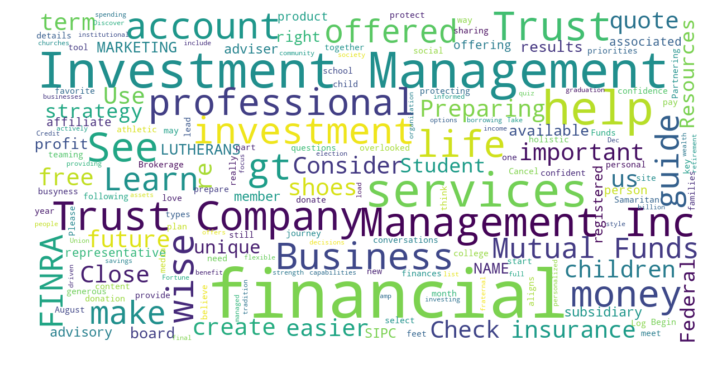

In [145]:
url = 'https://www.thrivent.com/'
security_check(url)
links_count(url)
tf_all, tf_p = contents_url(url)
show_wordcloud(tf_p)

### website 4: Fidelity

Excellent! Your website is security by using https
Your website has 139 internal links, and 10 external links


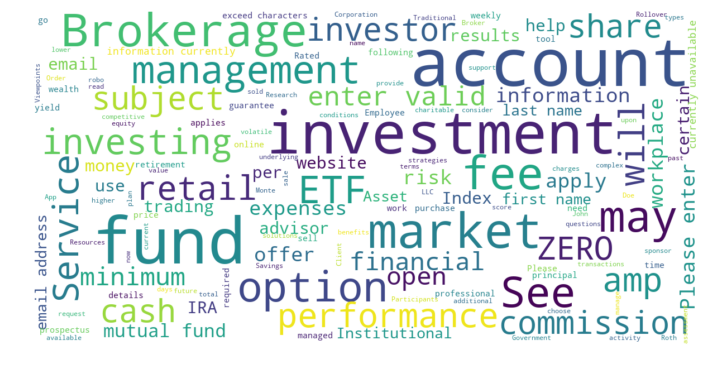

In [146]:
url = 'https://www.fidelity.com/'
security_check(url)
links_count(url)
fi_all, fi_p = contents_url(url)
show_wordcloud(fi_p) 

Your website is not security, please try to use https instead of http
Your website has 18 internal links, and 6 external links


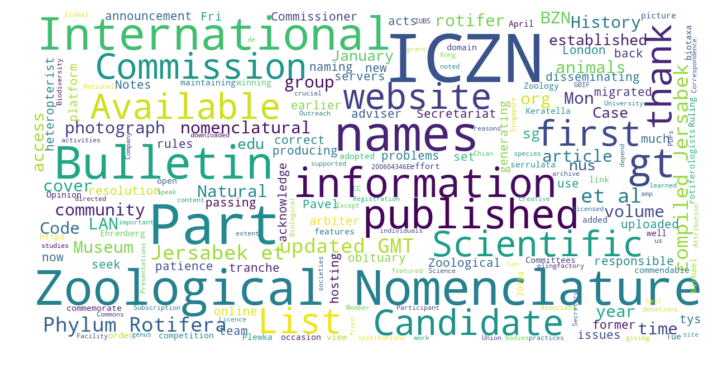

In [147]:
url = 'http://www.iczn.org/'
security_check(url)
links_count(url)
ic_all, ic_p = contents_url(url)
show_wordcloud(ic_p) 

### Similarity Score

In [11]:
def print_result(web1,web2,web1_all,web2_all,web1_p,web2_p):
    print('----Structural, Style and Overal Design Similarity----')
    struc = round(structural_similarity(web1_all,web2_all),4)
    style = round(style_similarity(web1_all,web2_all),4)
    overall_design = round(similarity(web1_all,web2_all),4)
    print('The structural similarity score between',web1,'and', web2, 'is:',struc)
    print('The style similarity score between',web1,'and', web2, 'is:',style)
    print('The overal design similarity score between',web1,'and', web2, 'is:',overall_design,'\n') 
    print('----Content Similarity----')
    content = round(cosine_sim(web1_p, web2_p),4)
    print('The content similarity score between',web1,'and', web2, 'is:',content,'\n')

In [23]:
print_result('Lincoln Park Vet', 'Family Pet Animal Hospital',lp_all,fpah_all,lp_p,fpah_p)

----Structural, Style and Overal Design Similarity----
The structural similarity score between Lincoln Park Vet and Family Pet Animal Hospital is: 0.0148
The style similarity score between Lincoln Park Vet and Family Pet Animal Hospital is: 0.0075
The overal design similarity score between Lincoln Park Vet and Family Pet Animal Hospital is: 0.0111 

----Content Similarity----
The content similarity score between Lincoln Park Vet and Family Pet Animal Hospital is: 0.4086 



In [25]:
print_result('Lincoln Park Vet', 'Thrivent Finance',lp_all,tf_all,lp_p,tf_p)

----Structural, Style and Overal Design Similarity----
The structural similarity score between Lincoln Park Vet and Thrivent Finance is: 0.0284
The style similarity score between Lincoln Park Vet and Thrivent Finance is: 0.0101
The overal design similarity score between Lincoln Park Vet and Thrivent Finance is: 0.0192 

----Content Similarity----
The content similarity score between Lincoln Park Vet and Thrivent Finance is: 0.0475 



In [26]:
print_result('Fidelity', 'Thrivent Finance',fi_all,tf_all,fi_p,tf_p)

----Structural, Style and Overal Design Similarity----
The structural similarity score between Fidelity and Thrivent Finance is: 0.0424
The style similarity score between Fidelity and Thrivent Finance is: 0.0052
The overal design similarity score between Fidelity and Thrivent Finance is: 0.0238 

----Content Similarity----
The content similarity score between Fidelity and Thrivent Finance is: 0.2402 



In [29]:
t1_all, t1_p = contents_url('https://www.coldwatercreek.com/petites')
t2_all, t2_p = contents_url('https://www.coldwatercreek.com/misses')
print_result('ColdWater 1', 'ColdWater 2',t1_all,t2_all,t1_p,t2_p)
# show_wordcloud(fi_p) 

----Structural, Style and Overal Design Similarity----
The structural similarity score between ColdWater 1 and ColdWater 2 is: 0.9965
The style similarity score between ColdWater 1 and ColdWater 2 is: 1.0
The overal design similarity score between ColdWater 1 and ColdWater 2 is: 0.9983 

----Content Similarity----
The content similarity score between ColdWater 1 and ColdWater 2 is: 0.5407 



In [5]:
# url = 'https://www.lincolnparkvet.vet/'
# options = webdriver.ChromeOptions()
# options.headless = False
# driver = webdriver.Chrome(options=options)
# driver.get(url)
# list_tags = []
# html_source = driver.page_source
# txt = re.findall(r'<[a-zA-Z]+', html_source)
# for x in txt:
#     list_tags.append(x.replace('<', ''))
# list_tags = list(dict.fromkeys(list_tags))
# final_list = []

# for i in list_tags:
#     tag = driver.find_elements_by_tag_name(i)
#     tag_back_col = []
#     tag_col = []
#     tag_img = []
#     tag_border = []
#     for j in tag:
#         back_col = j.value_of_css_property('background-color')
#         tag_back_col.append(back_col)
#         col = j.value_of_css_property('color')
#         tag_col.append(col)
#         bord = j.value_of_css_property('border-color')
#         tag_border.append(bord)
#         img = j.value_of_css_property('background-image')
#         tag_img.append(img)
#     final_list .append((i, tag_back_col, tag_col, tag_border, tag_img))
# driver.close()